# Hwang (WMP) Doppler boradening v.s. traditional χ, ψ Breit-Wigner profiles


#### A 1-level-1channel toy Problem

This program implements in Python 3 :
      - a toy-problem for Doppler broadening of a resonance.
      - comparisons for the Hwang v.s. the SLBW resonances
      - plots things

NOTE : author is Pablo DUCRU, for any inquires please e-mail at  *** p_ducru@mit.edu ***

In [1]:
## Import Python package for linear algebra
import numpy as np

In [2]:
import scipy

In [3]:
import scipy.special as faddeeva

In [4]:
## Importing Python packages for plotting
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter


Import local data and functions

In [5]:
import slbw 
from slbw import * #exact_Σγ, exact_Real_SLBW, zeroK_exact_Re_SLBW_χψ_Σγ, exact_dΣγ_dΓ, z_space_Σγ, analytic_Σγ, analytic_dΣγ_dΓ, multipole_Σ, multipole_dΣ_dΓ, exact_poles_and_residues , exact_poles_and_residues_differentials_dΠ_dΓ
from data import a_U238, ρ0_U238, ρ0, μ_E0_U238, μ_Γn_U238, μ_Γγ_U238, μ_Γ_U238, cov_Γ_U238 
from vector_fit import VF_algorithm, rational_function

## Nuclear Cross Section Model (SLBW 0K with BS applox for this toy problem)

#### Plotting the cross section

> This toy-problem consists of the 1st caputre cross section of U-238

In [6]:
# Energy grid structure
E_max = 1.5*10**(2) # Minimum energy of the energy groups
E_min = 10**(-3) # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5 # Energy groups (here log-spaced) for flux ψ

# number densities (corrected to include the spin statistical factors)
N_densities = np.array([1,(0.124954)*1.0])

# scattering cross section
σ_nn = 0.166810

In [7]:
a = 0 
Γ = μ_Γ_U238
b = 2*np.pi*Γ[1]*Γ[2]/(ρ0**2*Γ[0]**0.5*(Γ[1]+ Γ[2]))
r = a - 1j*b

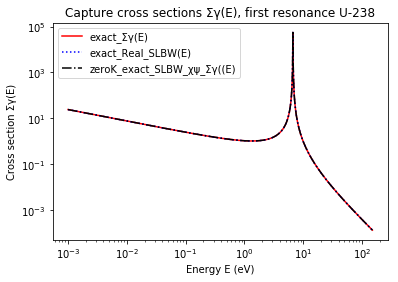

In [8]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
plt.loglog(E_g , np.array([exact_Σγ(E_g[g], μ_Γ_U238) for g in range(E_g.size)]) , '-r', label='exact_Σγ(E)') 
plt.loglog(E_g , np.array([exact_Real_SLBW(E_g[g], μ_Γ_U238, r) for g in range(E_g.size)]) , ':b', label='exact_Real_SLBW(E)') 
plt.loglog(E_g , np.array([zeroK_exact_SLBW_χψ_Σγ(E_g[g], μ_Γ_U238, a , b) for g in range(E_g.size)]) , '-.k', label='zeroK_exact_SLBW_χψ_Σγ((E)') 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

/home/icmeyer/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


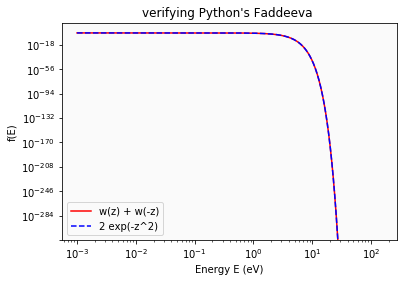

In [9]:
## Plot the mean cross section values. 
titre_Σ = "verifying Python's Faddeeva "
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

plt.loglog(E_g , faddeeva.wofz(E_g) + faddeeva.wofz(-E_g) , '-r', label='w(z) + w(-z)') 
plt.loglog(E_g , 2*np.exp(-E_g**2) , '--b', label='2 exp(-z^2)') 
plt.ylabel('f(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

## Doppler broadening of SLBW

> We here validate the equations for the cross section Breit-Wigner Doppler broadening

testing the $\psi$ and $\chi$ functions

In [10]:
x_max = 4 # Minimum energy of the energy groups
x_min = 0 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
x_grid = np.linspace(x_max, x_min, N_g) 

τ1 = 0.000000001 #K
τ2 = 0.1 #K 
τ3 = 0.2 #K
τ4 = 0.5 #K



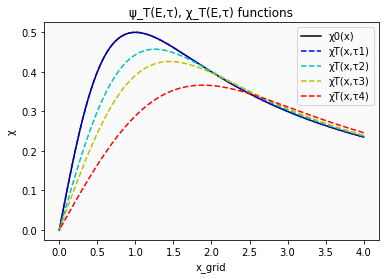

In [11]:
## Plot the mean cross section values. 
titre_Σ = 'ψ_T(E,τ), χ_T(E,τ) functions'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
plt.plot(x_grid , np.array([χ0(x_grid[g]) for g in range(x_grid.size)]) , '-k', label='χ0(x)') 
plt.plot(x_grid , np.array([χT_Faddeeva_approx(x_grid[g],τ1) for g in range(x_grid.size)]) , '--b', label='χT(x,τ1)') 
plt.plot(x_grid , np.array([χT_Faddeeva_approx(x_grid[g],τ2) for g in range(x_grid.size)]) , '--c', label='χT(x,τ2)')  
plt.plot(x_grid , np.array([χT_Faddeeva_approx(x_grid[g],τ3) for g in range(x_grid.size)]) , '--y', label='χT(x,τ3)') 
plt.plot(x_grid , np.array([χT_Faddeeva_approx(x_grid[g],τ4) for g in range(x_grid.size)]) , '--r', label='χT(x,τ4)')  
plt.ylabel('χ')
plt.xlabel('x_grid')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

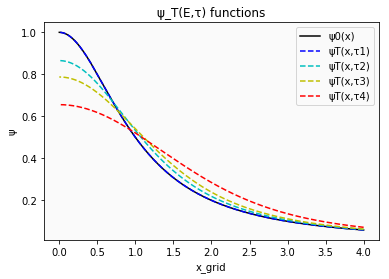

In [12]:
## Plot the mean cross section values. 
titre_Σ = 'ψ_T(E,τ) functions'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
plt.plot(x_grid , np.array([ψ0(x_grid[g]) for g in range(x_grid.size)]) , '-k', label='ψ0(x)') 
plt.plot(x_grid , np.array([ψT_Faddeeva_approx(x_grid[g],τ1) for g in range(x_grid.size)]) , '--b', label='ψT(x,τ1)') 
plt.plot(x_grid , np.array([ψT_Faddeeva_approx(x_grid[g],τ2) for g in range(x_grid.size)]) , '--c', label='ψT(x,τ2)')  
plt.plot(x_grid , np.array([ψT_Faddeeva_approx(x_grid[g],τ3) for g in range(x_grid.size)]) , '--y', label='ψT(x,τ3)') 
plt.plot(x_grid , np.array([ψT_Faddeeva_approx(x_grid[g],τ4) for g in range(x_grid.size)]) , '--r', label='ψT(x,τ4)')  
plt.ylabel('ψ')
plt.xlabel('x_grid')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

In [13]:
T1 = 10 #K
T2 = 10000 #K 

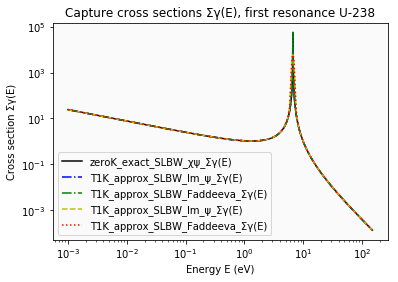

In [14]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
plt.loglog(E_g , np.array([zeroK_exact_SLBW_χψ_Σγ(E_g[g], Γ, a , b) for g in range(E_g.size)]) , '-k', label='zeroK_exact_SLBW_χψ_Σγ(E)') 
plt.loglog(E_g , np.array([TK_approx_SLBW_χψ_Σγ(E_g[g], Γ, a, b, T1) for g in range(E_g.size)]) , '-.b', label='T1K_approx_SLBW_Im_ψ_Σγ(E)') 
plt.loglog(E_g , np.array([TK_approx_SLBW_Faddeeva_Σγ(E_g[g], Γ, r ,T1) for g in range(E_g.size)]) , '-.g', label='T1K_approx_SLBW_Faddeeva_Σγ(E)') 
plt.loglog(E_g , np.array([TK_approx_SLBW_χψ_Σγ(E_g[g], Γ, a, b, T2) for g in range(E_g.size)]) , '--y', label='T1K_approx_SLBW_Im_ψ_Σγ(E)') 
plt.loglog(E_g , np.array([TK_approx_SLBW_Faddeeva_Σγ(E_g[g], Γ, r ,T2) for g in range(E_g.size)]) , ':r', label='T1K_approx_SLBW_Faddeeva_Σγ(E)') 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

## Multipole Doppler boradening (Hwang's method)

In [15]:
Π = exact_poles_and_residues(μ_Γ_U238)
Π

array([[ 2.58346385-2.34213650e-03j,  0.        +1.41137236e+03j],
       [-2.58346385+2.34213650e-03j,  0.        +1.41137236e+03j]])

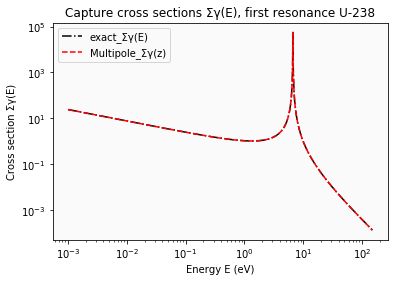

In [16]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
plt.loglog(E_g , np.array([exact_Σγ(E_g[g], μ_Γ_U238) for g in range(E_g.size)]) , '-.k', label='exact_Σγ(E)') 
plt.loglog(z_g**2 , np.array([multipole_Σ(z_g[g], Π) for g in range(z_g.size)]) , '--r', label='Multipole_Σγ(z)') 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

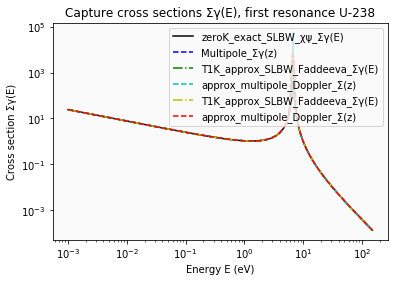

In [17]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
plt.loglog(E_g , np.array([zeroK_exact_SLBW_χψ_Σγ(E_g[g], Γ, a , b) for g in range(E_g.size)]) , '-k', label='zeroK_exact_SLBW_χψ_Σγ(E)') 
plt.loglog(z_g**2 , np.array([multipole_Σ(z_g[g], Π) for g in range(z_g.size)]) , '--b', label='Multipole_Σγ(z)') 

plt.loglog(E_g , np.array([TK_approx_SLBW_Faddeeva_Σγ(E_g[g], Γ, r ,T1) for g in range(E_g.size)]) , '-.g', label='T1K_approx_SLBW_Faddeeva_Σγ(E)') 
plt.loglog(z_g**2 , np.array([approx_multipole_Doppler_Σ(z_g[g], Π, T1) for g in range(z_g.size)]) , '--c', label='approx_multipole_Doppler_Σ(z)') 

plt.loglog(E_g , np.array([TK_approx_SLBW_Faddeeva_Σγ(E_g[g], Γ, r ,T2) for g in range(E_g.size)]) , '-.y', label='T1K_approx_SLBW_Faddeeva_Σγ(E)') 
plt.loglog(z_g**2 , np.array([approx_multipole_Doppler_Σ(z_g[g], Π, T2) for g in range(z_g.size)]) , '--r', label='approx_multipole_Doppler_Σ(z)') 


plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

## Accuracy difference between the SLBW and the Hwang method

In [18]:
# Energy grid structure
E_max = 2*10**(1) # Minimum energy of the energy groups
E_min = 2*10**(0) # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g_lin = np.linspace(E_min,E_max,N_g) # Energy groups (here log-spaced) for flux ψ
z_g_lin = E_g_lin**0.5 # Energy groups (here log-spaced) for flux ψ


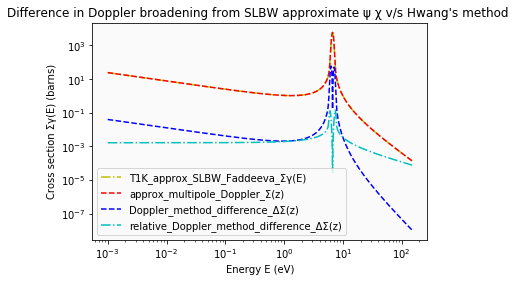

In [19]:
## Plot the mean cross section values. 
titre_Σ = "Difference in Doppler broadening from SLBW approximate ψ χ v/s Hwang's method "
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
T1K_approx_SLBW_Faddeeva_Σγ = np.array([TK_approx_SLBW_Faddeeva_Σγ(E_g[g], Γ, r ,T2) for g in range(E_g.size)])
approx_multipole_Doppler_Σγ = np.array([approx_multipole_Doppler_Σ(z_g[g], Π, T2) for g in range(z_g.size)])

plt.loglog(E_g , T1K_approx_SLBW_Faddeeva_Σγ , '-.y', label='T1K_approx_SLBW_Faddeeva_Σγ(E)') 
plt.loglog(z_g**2 , approx_multipole_Doppler_Σγ , '--r', label='approx_multipole_Doppler_Σ(z)') 
plt.loglog(z_g**2 , np.array([np.abs(approx_multipole_Doppler_Σ(z_g[g], Π, T2) - TK_approx_SLBW_Faddeeva_Σγ(E_g[g], Γ, r ,T2)) for g in range(z_g.size)]) , '--b', label='Doppler_method_difference_ΔΣ(z)') 
plt.loglog(z_g**2 , np.array([np.abs(approx_multipole_Doppler_Σ(z_g[g], Π, T2) - TK_approx_SLBW_Faddeeva_Σγ(E_g[g], Γ, r ,T2))/approx_multipole_Doppler_Σ(z_g[g], Π, T2) for g in range(z_g.size)]) , '-.c', label='relative_Doppler_method_difference_ΔΣ(z)') 

plt.ylabel('Cross section Σγ(E) (barns)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

## Isaac Broadening below this Line

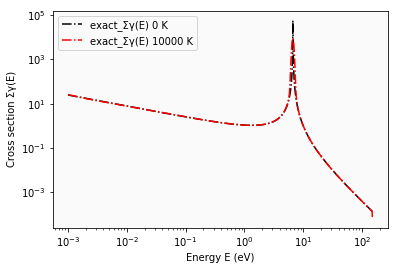

In [20]:
# Broaden the 0 K cross section
from brute_force.doppler import broaden
import copy

exact_Σγ_0K = np.array([exact_Σγ(E_g[g], μ_Γ_U238) for g in range(E_g.size)])
T_broad = 10000 # Kelvin
A = 238
sigma1_Doppler_Σγ = broaden(E_g, exact_Σγ_0K, T_broad, A, E_g)

plt.loglog(E_g , np.array([exact_Σγ(E_g[g], μ_Γ_U238) for g in range(E_g.size)]) , '-.k', label='exact_Σγ(E) 0 K') 
plt.loglog(E_g , sigma1_Doppler_Σγ , '-.r', label='exact_Σγ(E) {:d} K'.format(T_broad)) 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.legend()

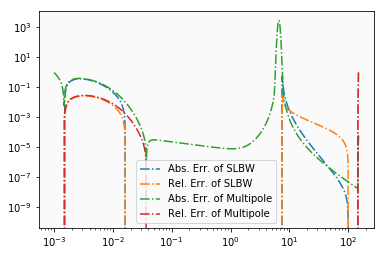

In [21]:
# Comparison at 10000 K between methods
abs_err_of_SLBW_Faddeeva = T1K_approx_SLBW_Faddeeva_Σγ - sigma1_Doppler_Σγ
rel_err_of_SLBW_Faddeeva = (T1K_approx_SLBW_Faddeeva_Σγ - sigma1_Doppler_Σγ)/(sigma1_Doppler_Σγ)

abs_err_of_multipole_Doppler = np.abs(approx_multipole_Doppler_Σγ - sigma1_Doppler_Σγ)
rel_err_of_multipole_Doppler = (approx_multipole_Doppler_Σγ - sigma1_Doppler_Σγ)/(sigma1_Doppler_Σγ)

plt.loglog(E_g , abs_err_of_SLBW_Faddeeva, '-.', label='Abs. Err. of SLBW') 
plt.loglog(E_g , rel_err_of_SLBW_Faddeeva, '-.', label='Rel. Err. of SLBW') 

plt.loglog(E_g , abs_err_of_multipole_Doppler, '-.', label='Abs. Err. of Multipole') 
plt.loglog(E_g , rel_err_of_multipole_Doppler, '-.', label='Rel. Err. of Multipole')
plt.legend()

## Maximum error as a function of temperature

At temperature: 0.001000 K


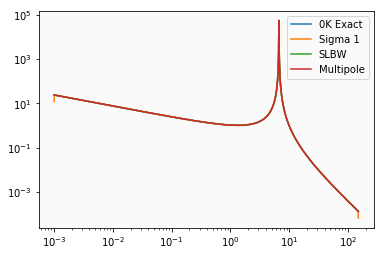

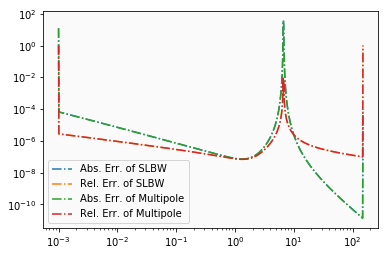

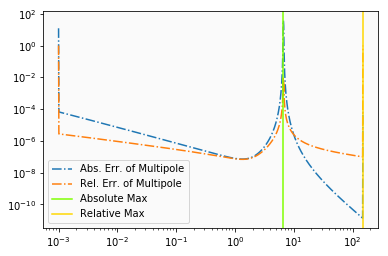

At temperature: 100000.000900 K


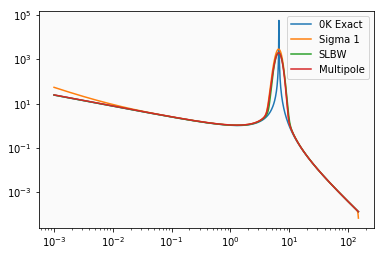

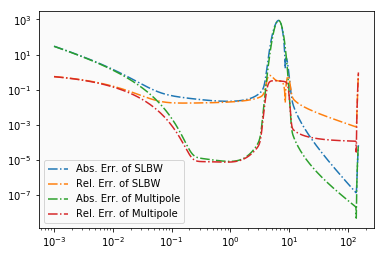

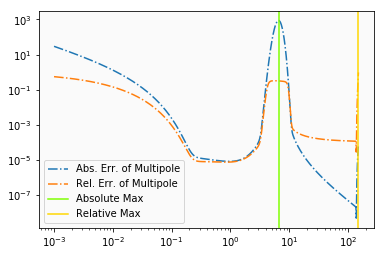

At temperature: 200000.000800 K


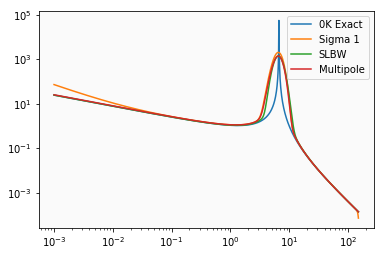

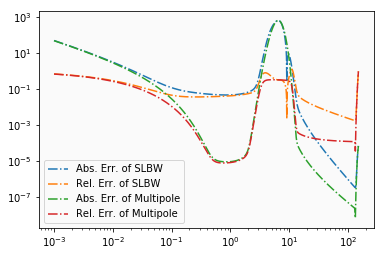

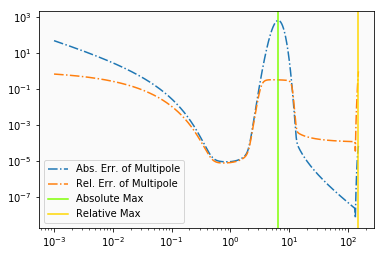

At temperature: 300000.000700 K


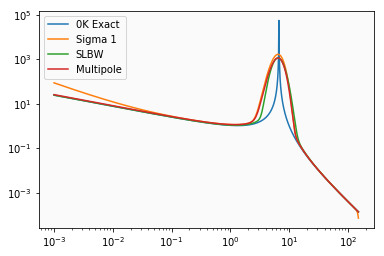

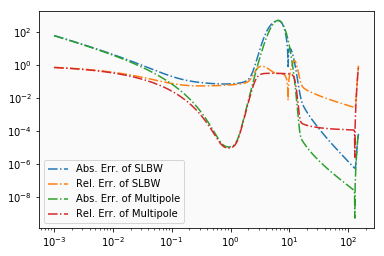

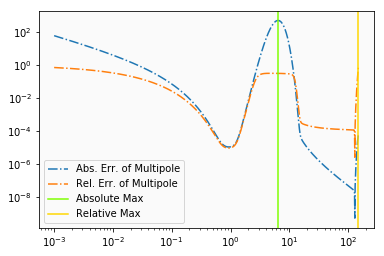

At temperature: 400000.000600 K


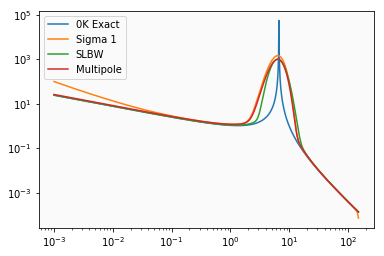

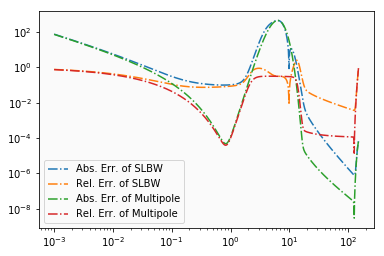

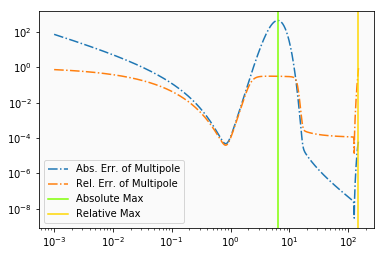

At temperature: 500000.000500 K


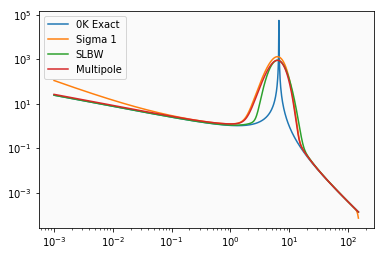

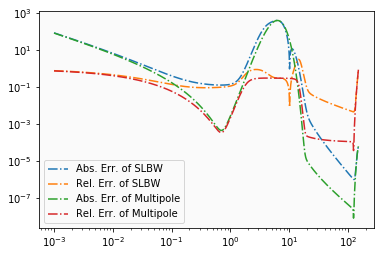

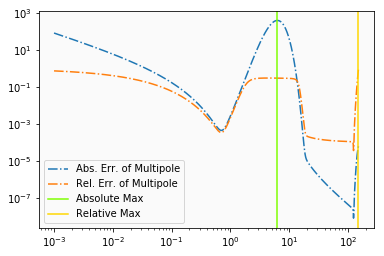

At temperature: 600000.000400 K


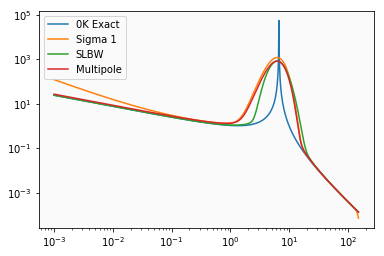

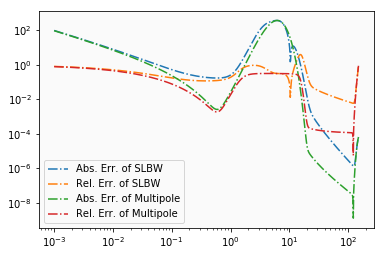

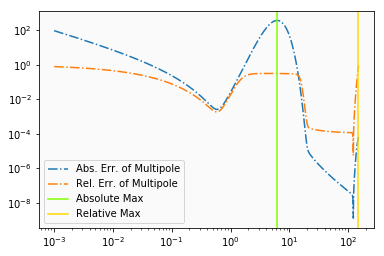

At temperature: 700000.000300 K


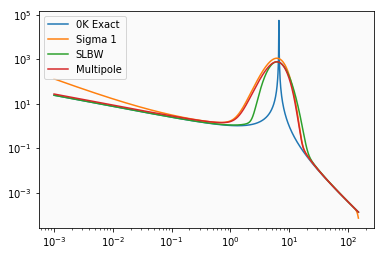

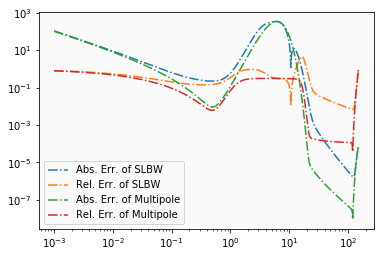

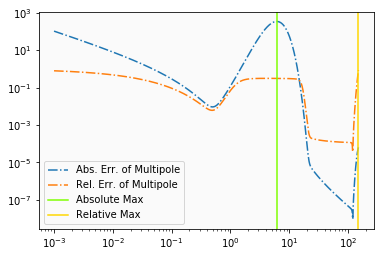

At temperature: 800000.000200 K


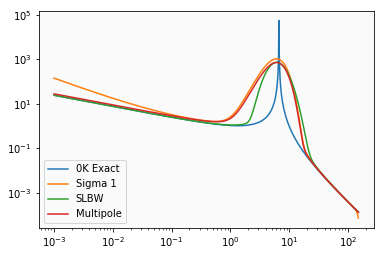

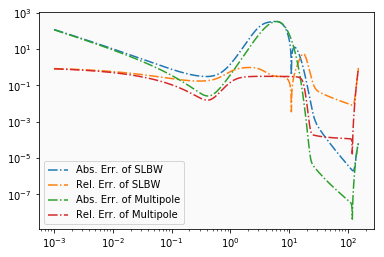

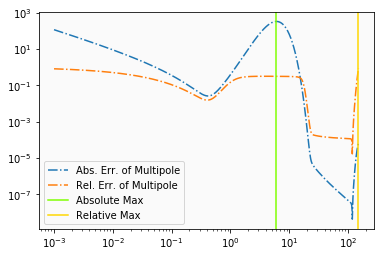

At temperature: 900000.000100 K


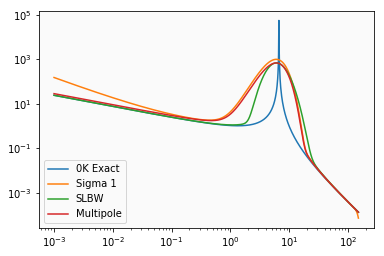

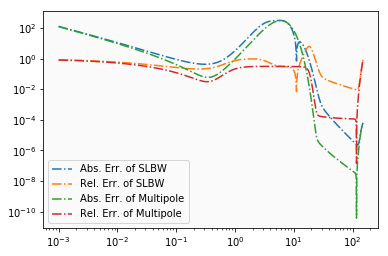

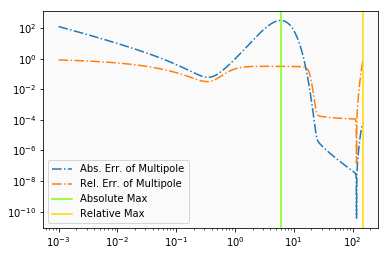

At temperature: 1000000.000000 K


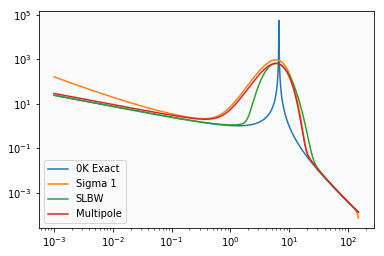

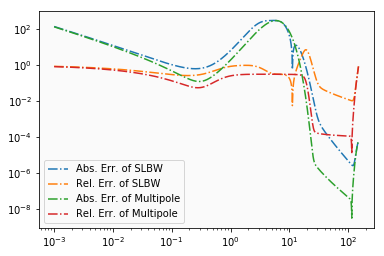

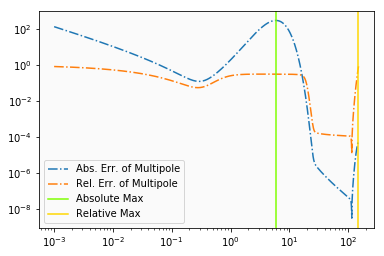

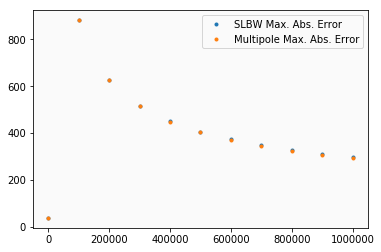

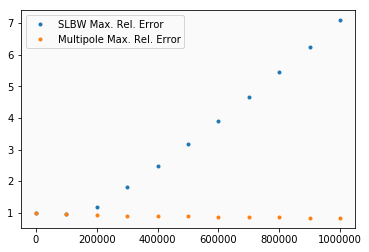

In [22]:
slbw_max_abs_error = []
slbw_max_rel_error = []
slbw_abs_error_vecs = []
slbw_rel_error_vecs = []
multipole_max_rel_error = []
multipole_max_abs_error = []
multipole_abs_error_vecs = []
multipole_rel_error_vecs = []
Ts = np.linspace(1e-3,1e6,11)
# Ts = np.append(Ts, 300e6)
for T in Ts:
    print('At temperature: {:f} K'.format(T))
    slbw_xs = np.array([TK_approx_SLBW_Faddeeva_Σγ(E_g[g], Γ, r ,T) for g in range(E_g.size)])
    multipole_xs = np.array([approx_multipole_Doppler_Σ(z_g[g], Π, T) for g in range(z_g.size)])
    sigma1_xs = broaden(E_g, exact_Σγ_0K, T, A, E_g)
    slbw_abs_err = np.abs(slbw_xs - sigma1_xs)
    slbw_rel_err = (slbw_abs_err)/sigma1_xs
    multipole_abs_err = np.abs(multipole_xs - sigma1_xs)
    multipole_rel_err = (multipole_abs_err)/sigma1_xs
    
    slbw_max_abs_error.append(np.max(slbw_abs_err))
    slbw_max_rel_error.append(np.max(slbw_rel_err))
    multipole_max_abs_error.append(np.max(multipole_abs_err))
    multipole_max_rel_error.append(np.max(multipole_rel_err))
    
    slbw_abs_error_vecs.append(copy.deepcopy(slbw_abs_err))
    slbw_rel_error_vecs.append(copy.deepcopy(slbw_rel_err))
    multipole_abs_error_vecs.append(copy.deepcopy(multipole_abs_err))
    multipole_rel_error_vecs.append(copy.deepcopy(multipole_rel_err))
    
    # Plot xs
    plt.loglog(E_g, exact_Σγ_0K, label='0K Exact')
    plt.loglog(E_g, sigma1_xs, label='Sigma 1')
    plt.loglog(E_g , slbw_xs, label='SLBW')
    plt.loglog(E_g , multipole_xs, label='Multipole')
    plt.legend()
    plt.show()
    
    # Plot error individual error plots
    plt.loglog(E_g , slbw_abs_err, '-.', label='Abs. Err. of SLBW') 
    plt.loglog(E_g , slbw_rel_err, '-.', label='Rel. Err. of SLBW') 
    plt.loglog(E_g , multipole_abs_err, '-.', label='Abs. Err. of Multipole') 
    plt.loglog(E_g , multipole_rel_err, '-.', label='Rel. Err. of Multipole')
    plt.legend()
    plt.show()
    
    # Plot multipole only and mark maximums
    plt.loglog(E_g , multipole_abs_err, '-.', label='Abs. Err. of Multipole') 
    plt.loglog(E_g , multipole_rel_err, '-.', label='Rel. Err. of Multipole')
    plt.axvline(x=E_g[np.argmax(multipole_abs_err)], color='chartreuse', label='Absolute Max')
    plt.axvline(x=E_g[np.argmax(multipole_rel_err)], color='gold', label='Relative Max')
    plt.legend()
    plt.show()
    
plt.plot(Ts, slbw_max_abs_error, '.', label='SLBW Max. Abs. Error')
plt.plot(Ts, multipole_max_abs_error, '.', label='Multipole Max. Abs. Error')
plt.legend()
plt.show()


plt.plot(Ts, slbw_max_rel_error, '.', label='SLBW Max. Rel. Error')
plt.plot(Ts, multipole_max_rel_error, '.', label='Multipole Max. Rel. Error')
plt.legend()

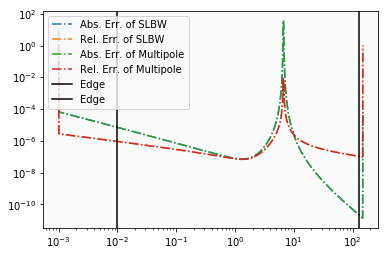

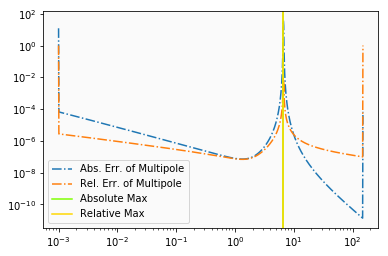

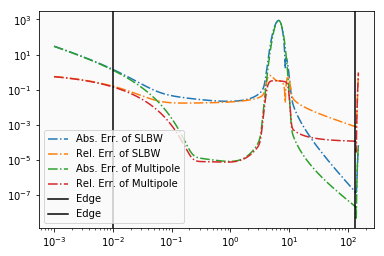

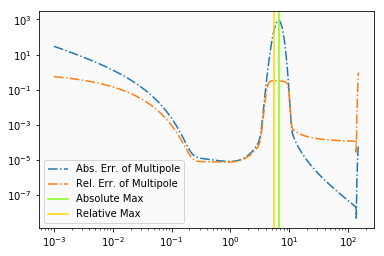

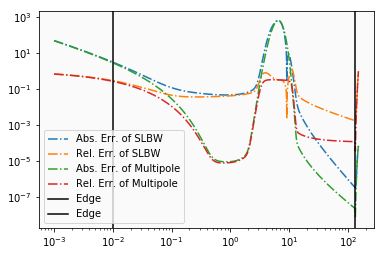

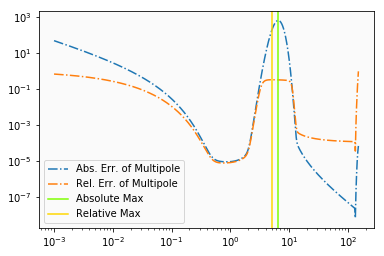

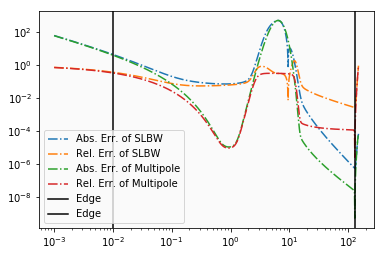

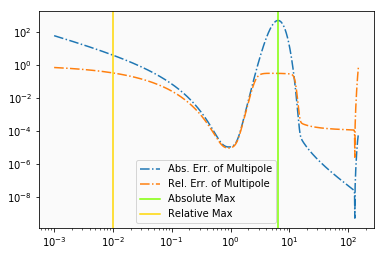

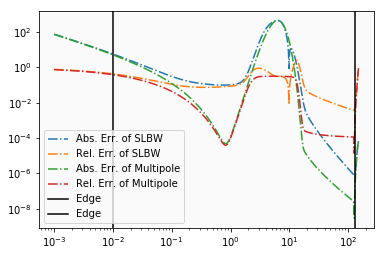

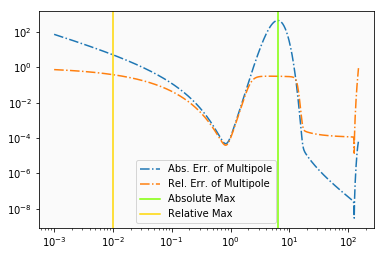

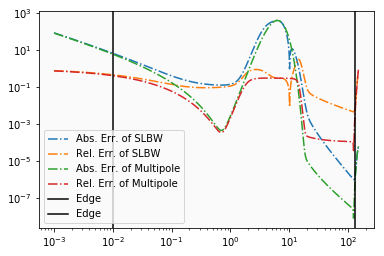

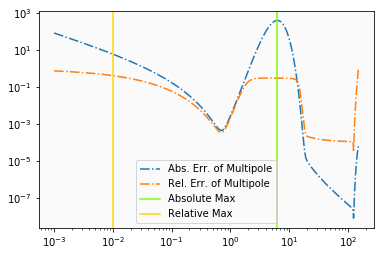

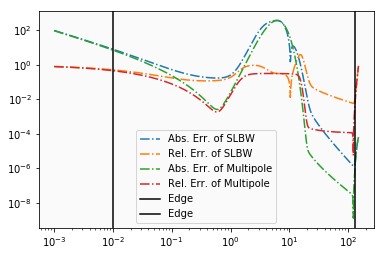

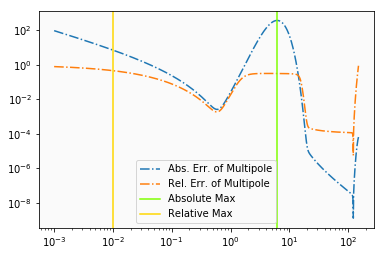

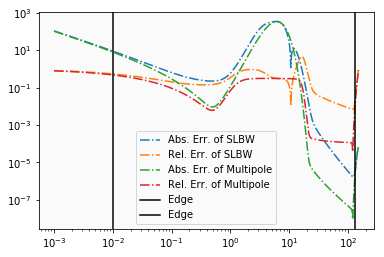

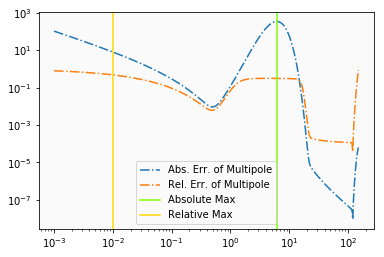

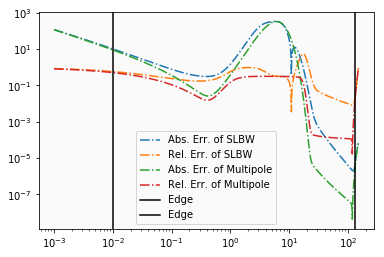

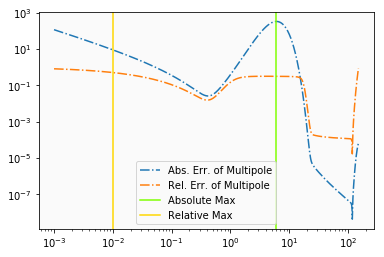

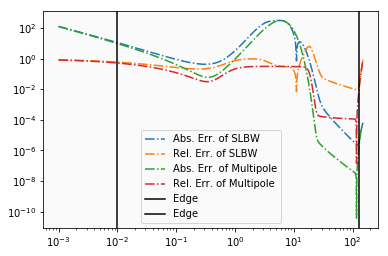

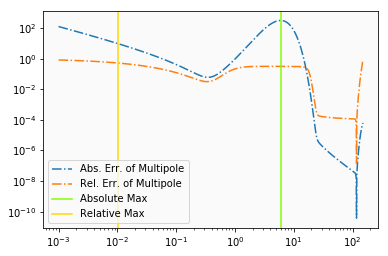

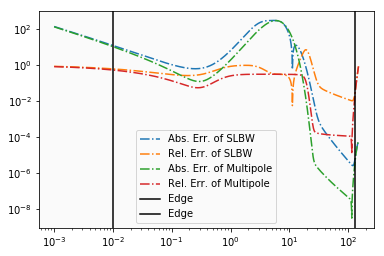

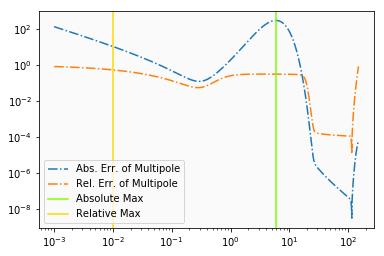

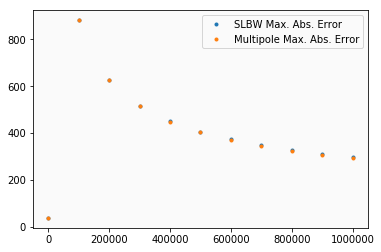

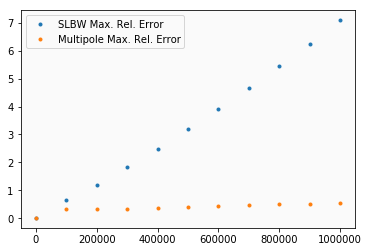

In [23]:
# Plot Max Errors using smaller energy range
energy_inner_min = 1e-2
energy_inner_max = 130
low_ind = np.searchsorted(E_g, energy_inner_min)
high_ind = np.searchsorted(E_g, energy_inner_max)

slbw_max_abs_error = []
slbw_max_rel_error = []
multipole_max_rel_error = []
multipole_max_abs_error = []
for i in range(len(Ts)):
    slbw_abs_err = slbw_abs_error_vecs[i][low_ind:high_ind]
    slbw_rel_err = slbw_rel_error_vecs[i][low_ind:high_ind]
    multipole_abs_err = multipole_abs_error_vecs[i][low_ind:high_ind]
    multipole_rel_err = multipole_rel_error_vecs[i][low_ind:high_ind]
    
    slbw_max_abs_error.append(np.max(slbw_abs_err))
    slbw_max_rel_error.append(np.max(slbw_rel_err))
    multipole_max_abs_error.append(np.max(multipole_abs_err))
    multipole_max_rel_error.append(np.max(multipole_rel_err))
    
    plt.loglog(E_g , slbw_abs_error_vecs[i], '-.', label='Abs. Err. of SLBW') 
    plt.loglog(E_g , slbw_rel_error_vecs[i], '-.', label='Rel. Err. of SLBW') 
    plt.loglog(E_g , multipole_abs_error_vecs[i], '-.', label='Abs. Err. of Multipole') 
    plt.loglog(E_g , multipole_rel_error_vecs[i], '-.', label='Rel. Err. of Multipole')
    plt.axvline(x=energy_inner_min, color='k', label='Edge')
    plt.axvline(x=energy_inner_max, color='k', label='Edge')
    plt.legend()
    plt.show()
    
    # Plot multipole only and mark maximums
    plt.loglog(E_g , multipole_abs_error_vecs[i], '-.', label='Abs. Err. of Multipole') 
    plt.loglog(E_g , multipole_rel_error_vecs[i], '-.', label='Rel. Err. of Multipole')
    plt.axvline(x=E_g[low_ind:high_ind][np.argmax(multipole_abs_err)], color='chartreuse', label='Absolute Max')
    plt.axvline(x=E_g[low_ind:high_ind][np.argmax(multipole_rel_err)], color='gold', label='Relative Max')
    plt.legend()
    plt.show()

plt.plot(Ts, slbw_max_abs_error, '.', label='SLBW Max. Abs. Error')
plt.plot(Ts, multipole_max_abs_error, '.', label='Multipole Max. Abs. Error')
plt.legend()
plt.show()

plt.plot(Ts, slbw_max_rel_error, '.', label='SLBW Max. Rel. Error')
plt.plot(Ts, multipole_max_rel_error, '.', label='Multipole Max. Rel. Error')
plt.legend()